# Application of Quantum Kernels

Our plan today:

    * Recap the Quantum Kernels
    * Application of QSVM on real data
        * ML workflow
        * Problem of large datasets
            * Bagging and boosting
    * Kernel Ridge Regression
        * With and without Quantum Kernel
    * Kernel PCA
        * With and without Quantum Kernel

***

***
# Recap of Quantum Kernels


***

In [1]:
# Import numpy
import numpy as np

# Import basic object from the Qiskit
from qiskit import QuantumCircuit
from qiskit import Aer,BasicAer
from qiskit import execute

# We will need these two
from qiskit.utils import QuantumInstance
from qiskit_machine_learning.kernels import QuantumKernel

# Load account from the disk
from qiskit import IBMQ
IBMQ.load_account() 

# We will need this for plots
from qiskit.visualization import plot_histogram,plot_bloch_multivector


In [2]:
# Check the version of the qiskit you use

# Compared to previous class, I have installed the up-to-date version
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright

In [3]:
# Ideal simulator
simulator = Aer.get_backend('qasm_simulator')

# Real-like simulator
from qiskit.providers.aer.noise import NoiseModel

# Choose a particuler quantum computer 
provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_belem')

# We derive the noise model from the chosen quantum computer
noise_model = NoiseModel.from_backend(backend)

# Further, we assume the specific qauntum computer:
# Get coupling map from backend
coupling_map = backend.configuration().coupling_map

# Get basis gates from noise model
basis_gates = noise_model.basis_gates

# define backend (simulator with specific noise)
backendSimWithNoise = QuantumInstance(
    Aer.get_backend("qasm_simulator"), 
    coupling_map=coupling_map,
                 basis_gates=basis_gates,
                 noise_model=noise_model,
                shots=1024
)

ibmqfactory.load_account:WARNING:2022-03-14 20:39:14,143: Credentials are already in use. The existing account in the session will be replaced.


## Visualising Feature Maps

* Let us review few feature maps

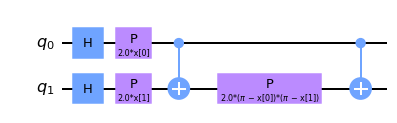

In [4]:
# Define Feature map, Pauli-Z evolution circuit 
from qiskit.circuit.library import ZZFeatureMap

# 2-qubits, 1 repetition
prep = ZZFeatureMap(2, reps=1)
prep.decompose().draw(output='mpl')

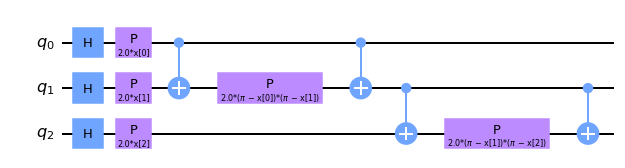

In [5]:
# Define Feature map, Pauli-Z evolution circuit 
from qiskit.circuit.library import ZZFeatureMap

# 2-qubits, 1 repetition
prep = ZZFeatureMap(3, reps=1,entanglement='linear')
prep.decompose().draw(output='mpl')

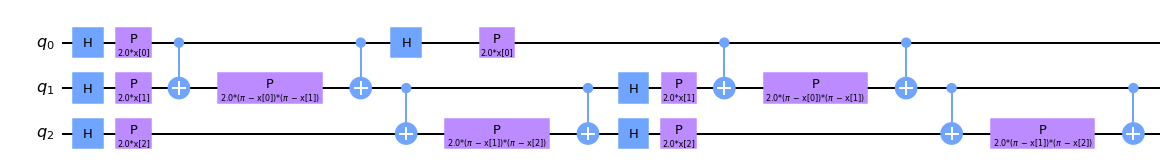

In [6]:
# Define Feature map, Pauli-Z evolution circuit 
from qiskit.circuit.library import ZZFeatureMap

# 2-qubits, 1 repetition
prep = ZZFeatureMap(3, reps=2,entanglement='linear')
prep.decompose().draw(output='mpl')

***
### Pauli Feature Map

* another option is fe-define Puali feature map

***

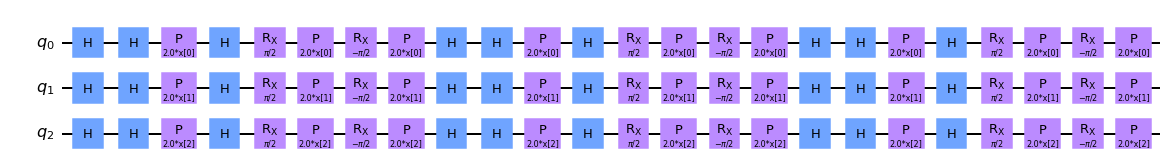

In [7]:
# Define Feature map, Pauli-Z evolution circuit 
from qiskit.circuit.library import PauliFeatureMap

prep = PauliFeatureMap(3, reps=3, paulis=['X', 'Y', 'Z'])
prep.decompose().draw(output='mpl')

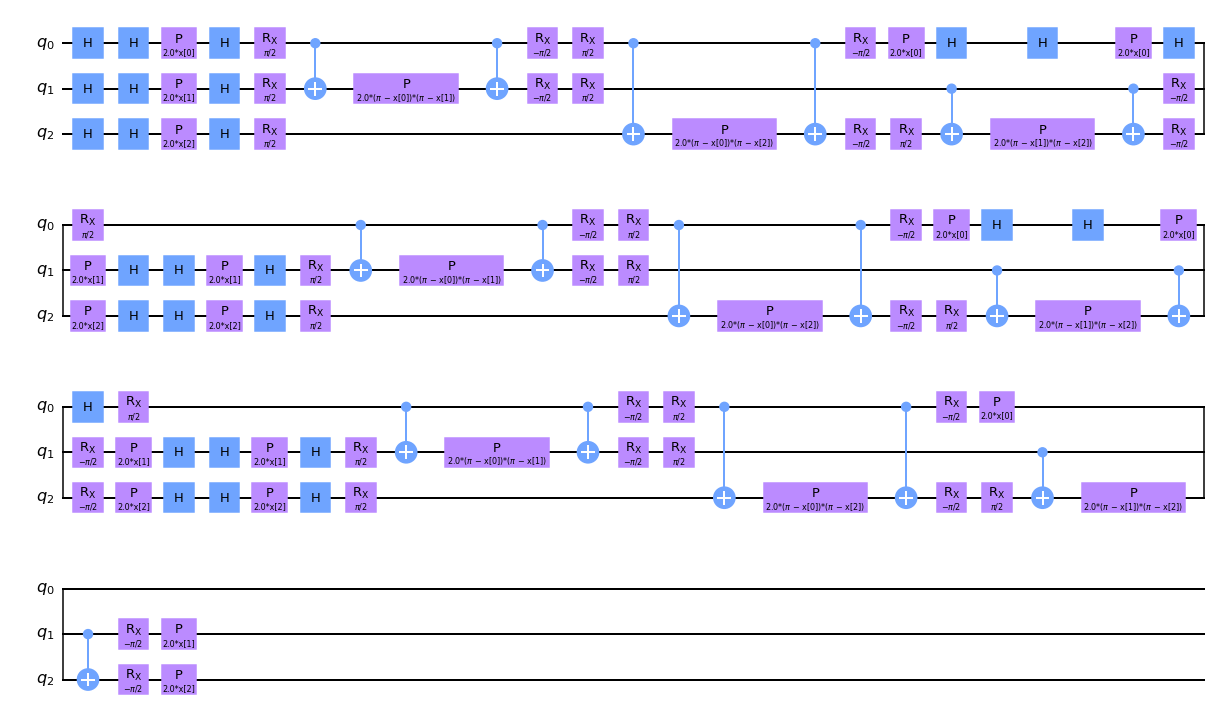

In [8]:
# Define Feature map, Pauli-Z evolution circuit 
from qiskit.circuit.library import PauliFeatureMap

prep = PauliFeatureMap(3, reps=3, paulis=['X', 'YY', 'Z'])
prep.decompose().draw(output='mpl')